<a href="https://colab.research.google.com/github/Sagnik220/Breast-Cancer-Prediction/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q pycaret

     |████████████████████████████████| 266kB 7.1MB/s 
     |████████████████████████████████| 6.8MB 11.1MB/s 
     |████████████████████████████████| 1.7MB 42.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 112kB 45.9MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 14.2MB 262kB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 174kB 45.4MB/s 
     |████████████████████████████████| 276kB 48.5MB/s 
     |████████████████████████████████| 2.0MB 29.7MB/s 
     |████████████████████████████████| 1.4MB 33.4MB/s 
     |████████████████████████████████| 256kB 53.7MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 153kB 44.2MB/s 
     |████████████████████████████████| 1.1MB 29.3MB/s

In [19]:
import pandas as pd

In [30]:
data=pd.read_csv('/content/cancer.csv')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [32]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [33]:
data=data.drop(['id','Unnamed: 32'],axis=1)

In [34]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
from pycaret.classification import *
s = setup(data=data, target = 'diagnosis')

,Description,Value
0,session_id,3423
1,Target,diagnosis
2,Target Type,Binary
3,Label Encoded,"B: 0, M: 1"
4,Original Data,"(569, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [36]:
best_model=compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9697,0.9926,0.9400,0.9804,0.9588,0.9350,0.9366,0.459
qda,Quadratic Discriminant Analysis,0.9622,0.9767,0.9475,0.9556,0.9505,0.9200,0.9213,0.016
lr,Logistic Regression,0.9599,0.9924,0.9400,0.9562,0.9456,0.9139,0.9168,0.466
ridge,Ridge Classifier,0.9598,0.0000,0.9008,0.9933,0.9440,0.9129,0.9163,0.014
lda,Linear Discriminant Analysis,0.9574,0.9903,0.8938,0.9938,0.9381,0.9061,0.9119,0.015
rf,Random Forest Classifier,0.9547,0.9879,0.9200,0.9585,0.9384,0.9027,0.9037,0.509
lightgbm,Light Gradient Boosting Machine,0.9523,0.9884,0.9271,0.9465,0.9356,0.8978,0.8992,0.138
gbc,Gradient Boosting Classifier,0.9472,0.9897,0.9067,0.9528,0.9277,0.8863,0.8886,0.250
knn,K Neighbors Classifier,0.9397,0.9585,0.9008,0.9399,0.9190,0.8711,0.8727,0.117
ada,Ada Boost Classifier,0.9397,0.9741,0.9067,0.9349,0.9184,0.8707,0.8736,0.129


In [37]:
print(best_model)

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3423, verbose=0,
                     warm_start=False), QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3423, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)]


In [38]:
et_model=create_model('et', fold = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9500,1.0000,0.8571,1.0000,0.9231,0.8864,0.8921
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9500,1.0000,0.8571,1.0000,0.9231,0.8864,0.8921
6,0.9500,0.9890,1.0000,0.8750,0.9333,0.8936,0.8987
7,0.9500,0.9688,0.8750,1.0000,0.9333,0.8936,0.8987
8,0.9000,0.9792,0.8750,0.8750,0.8750,0.7917,0.7917
9,0.9500,1.0000,0.8750,1.0000,0.9333,0.8936,0.8987


In [39]:
tune_etmodel=tune_model(et_model,optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9500,0.9920,0.8667,1.0000,0.9286,0.8904,0.8958
1,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459,0.9473
2,0.9750,0.9973,0.9333,1.0000,0.9655,0.9459,0.9473
3,0.9250,0.9733,0.8667,0.9286,0.8966,0.8378,0.8391
4,0.9250,0.9787,0.8667,0.9286,0.8966,0.8378,0.8391
5,0.9750,1.0000,1.0000,0.9375,0.9677,0.9474,0.9487
6,0.9750,0.9973,0.9333,1.0000,0.9655,0.9459,0.9473
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9487,0.9667,0.8667,1.0000,0.9286,0.8889,0.8944


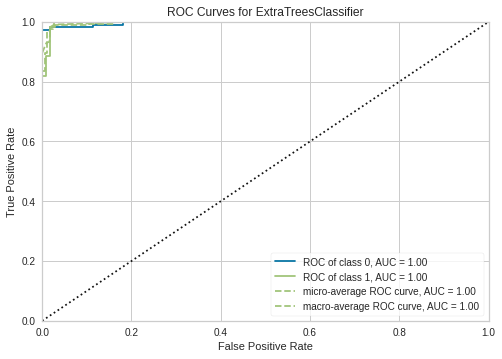

In [40]:
plot_model(tune_etmodel)

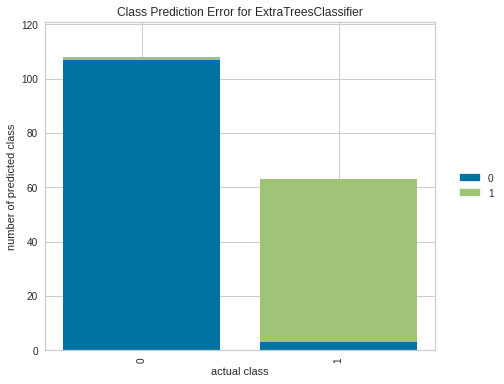

In [41]:
plot_model(tune_etmodel,'error')

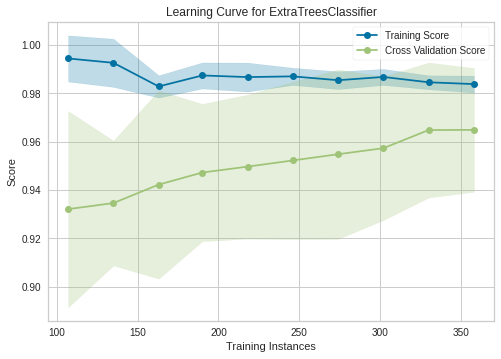

In [43]:
plot_model(tune_etmodel,'learning')

In [45]:
save_model(tune_etmodel,'breastcancer')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='diagnosis',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight={}, criterion='gini',
                                       max_depth=7, max_features=1.0,
                                       max_leaf_nodes=None,